# Gradiente Descendente -- Regresión Lineal

En el presente Notebook se realizará la implementación del Gradiente Descendente (Gradient Descent) para encontrar los coeficientes de una regresión lineal. La implementación se realizará a mano para facilitar la comprensión del proceso detrás del algoritmo de optimización. 

En la primera parte de este Notebook se realizará una representación gráfica del método del gradiente y su forma de operar. Posteriormente, la segunda sección mostrará cómo aplicarlo en la regresión lineal.

<table class="tfo-notebook-buttons" align="center">

  <td>
    <a target="_blank" href="colab.research.google.com/github.com/juancop/metodos_analitica_2/blob/dev/01_optimization/0_lab_gradient_descent_regression.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" /></a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/juancop/metodos_analitica_2/blob/dev/01_optimization/0_lab_gradient_descent_regression.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /></a>
  </td>
  
</table>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import imageio
import os

## Parte 1 -- El Método del Gradiente

Muchos algoritmos de Machine Learning requiren recurrir a un problema de optimización, en el cual se busca conseguir los coeficientes que minimicen el valor de una función de *pérdida*, $f(\beta)$. A continuación se presentará el método del gradiente para encontrar el punto que genera el valor mínimo de una función convexa. 

**Nota:** Si el objetivo en algún problema es maximizar la función $f(\beta)$, este puede reescribirse como un problema de minimización de $-f(\beta)$.


Supongamos que se tiene la función 
$$f(\beta) = \frac{1}{2} \beta^2,$$

con $\beta \in \mathbb{R}$.

In [2]:
def cost_function(beta):
  return 1/2 * beta**2

In [3]:
beta_space = np.linspace(-5, 5)
f_beta = cost_function(beta_space)

min_y, max_y = min(f_beta), max(f_beta)
min_x, max_x = min(beta_space), max(beta_space)

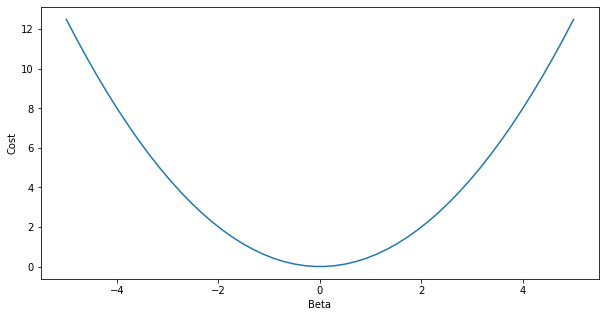

In [4]:
plt.figure(figsize = (10, 5))
plt.plot(beta_space, f_beta)
plt.xlabel("Beta")
plt.ylabel("Cost")
plt.show()

El punto que minimiza (o maximiza) la función objetivo se puede denotar con, 

$$\hat{\beta} = \operatorname{argmin} f(\beta).$$

Para encontrar este valor utilizando el método del gradiente descendente, necesitamos conocer el valor de la primera derivada de la función objetivo en un punto.

Para el caso de la función planteada, 

$$f'(\beta) = \beta .$$

La derivada aporta información de qué tan cerca (o lejos) estamos del mínimo de la función. 

- $f'(\beta) > 0$: Nos encontramos a la derecha del mínimo
- $f'(\beta) < 0$: Nos encontramos a la izquierda del mínimo
- $f'(\beta) = 0$: ¡Llegamos al mínimo!

In [5]:
def primera_derivada(beta):
  return beta

def tangent_line(x, beta):
  return primera_derivada(beta)*(x - beta) + cost_function(beta)

Suponiendo que tenemos un punto de partida $\beta^{(t)}$, podemos utilizar la regla de actualización, 

$$\beta^{(t+1)} := \beta^{(t)} + \alpha f'(\beta^{(t)}).$$

Esta regla de actualización debe ser utilizada hasta que se logre convergencia. 


In [6]:
beta_t = 4
iters = 50
lr = 0.5

def plot_gradient(beta_space, f_beta, beta_t, plot_tangent = True, limit_axis = True):
  """
  Esta función permite graficar la función de costo y la derivada en el punto. 

  """
  plt.plot(beta_space, f_beta, color = 'blue')
  plt.plot(beta_t, cost_function(beta_t), marker="o", markersize=10, color = 'red')
  if plot_tangent:
    plt.plot(beta_space, tangent_line(beta_space, beta_t))
  plt.xlabel("Beta")
  plt.ylabel("Cost")
  if limit_axis:
    plt.xlim(min_x, max_x)
    plt.ylim(min_y, max_y)



def plot_path(beta_next, beta_prev):
  """
  Esta función permite graficar el camino de la actualización
  """
  x = beta_prev
  y = cost_function(beta_prev)

  x2 = beta_next
  y2 = cost_function(beta_next)

  x_dx = x2 - x
  y_dy = y2 - y

  plt.arrow(x, y, x_dx, y_dy, head_width = 0.2)



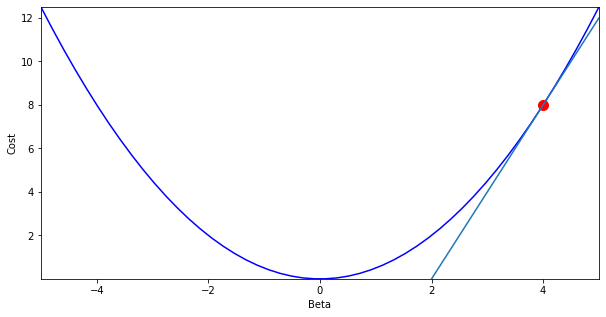

In [7]:
plt.figure(figsize = (10, 5))
plot_gradient(beta_space, f_beta, beta_t)
plt.show()

In [8]:
if not os.path.isdir('gds_folder'):
  os.mkdir('gds_folder')

Number of Iterations until convergence: 37


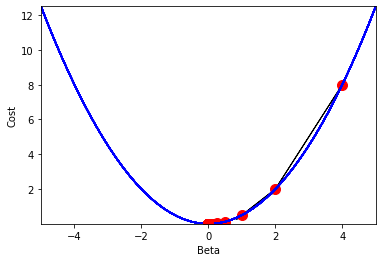

In [9]:

for idx in range(iters):
  _ = plot_gradient(beta_space, f_beta, beta_t, plot_tangent = False, limit_axis = True)
  if idx > 0:
    plot_path(beta_t, beta_prev)

    if abs(beta_t - beta_prev) < 1e-10:
      break

  plt.savefig(f'gds_folder/{str(idx).zfill(len(str(iters)))}.png')
  
  # Artefacto para Gráfico
  beta_prev = beta_t

  # Regla de Actualización
  beta_t = beta_t -  lr*primera_derivada(beta_t)

  
  
print(f'Number of Iterations until convergence: {idx+1}')


In [10]:
with imageio.get_writer('gradient_descent.gif', mode='I') as writer:
    for filename in [f'gds_folder/{str(idx).zfill(len(str(iters)))}.png' for idx in range(min(iters, idx))]:
        image = imageio.imread(filename)
        for _ in range(5):
          writer.append_data(image)

os.system("rm gds_folder/*")

0

## Parte 2 -- Regresión

A continuación buscaremos aplicar el método del gradiente para obtener los coeficientes de una regresión lineal. En este caso, lo que se busca es minimizar el error de predicción, medido como el Error Cuadrático Medio, en un conjunto de datos de diabetes. 

Nuestro interés es predecir el avance de la enfermedad dado un conjunto de variables como la edad, el sexo, ICM y presión en la sangre. Esta muestra corresponde a 442 individuos que participaron en un estudio. 

**Nota:** En este ejercicio omitimos train-test split. Se recomienda a los estudiantes realizarlo para tener el ejercicio completo.

In [11]:
from sklearn.datasets import load_diabetes

In [12]:
X, y = load_diabetes(return_X_y=True, as_frame=True)

In [13]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


A continuación presentamos la matriz de correlaciones para inspeccionar un poco los datos. En la matriz se puede observar que las medidas de sangre s1 y s2 tienen una correlación de 0.9, al igual que s3 y s4 que tienen -0.74. 

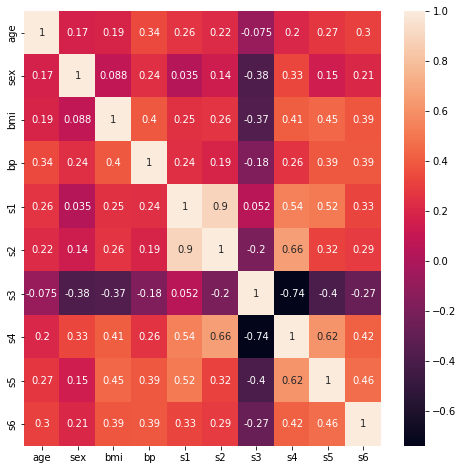

In [14]:
corr = X.corr()
plt.subplots(figsize=(8,8))
sns.heatmap(corr,annot=True)
plt.show()

In [15]:
X = X[['age', 'sex', 'bmi', 'bp', 's1', 's4', 's5', 's6']].copy()
X['intercept'] = 1

In [16]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [17]:
y = y.values.reshape(-1, 1)
X = X.values

Tenemos un conjunto de 10 variables explicativas que utilizaremos para construir nuestro modelo. Este se puede representar como, 

$$y_i = x_i'\beta + \varepsilon_i, $$

donde $x_i$ es un vector con las mediciones del estudio, $y_i$ es la medición del avance de la enfermedad, y $\varepsilon$ es una perturbación. 


En este problema, la función de pérdida viene dada por el MSE como, 

$$L = MSE = \sum_i^N \varepsilon ^ 2$$

$$L = MSE = \sum_i^N (y_i - x_i'\beta) ^ 2$$

Y nuestro interés es minimizar la función de pérdida $L(\beta)$, encontrando $\hat{\beta} = \operatorname{arg}  \operatorname{arg} L(\beta)$. 


En clase se vio que la regla de actualización para la regresión lineal viene dada por, 

$$\beta_k := \beta_k + \delta \sum_{i = 1}^N (y_i - x_i'\beta_k)x_{ik}$$

Esta ecuación es válida para cada uno de los $K$ coeficientes (incluido el intercepto).

### Paso 1. Definir Vector de Partida

Debemos definir cuál va a ser el punto inicial para comenzar la optimización. Como la función tiene un mínimo global, no importa dónde empecemos. 

In [18]:
N, K = X.shape # X (N x k)

In [19]:
beta_j = 10*np.random.normal(size = (K, 1)) # (k x 1)

In [20]:
beta_j

array([[ 8.46270609],
       [ 1.2760519 ],
       [-0.05525062],
       [-1.72223983],
       [-0.08472075],
       [-3.1705083 ],
       [ 6.50664716],
       [ 8.4258672 ],
       [12.68753395]])

### Paso 2. Definir Tasa de Aprendizaje
Debemos escoger cuál va a ser la tasa de aprendizaje del modelo, $\delta$. Además, se debe definir el número máximo de iteraciones que vamos a permitir realizar. 

In [21]:
lr = 0.1
max_iter = 100000

### Paso 3. Programar la Regla de Actualización

In [22]:
for idx in range(max_iter):
  error_vector = (y - np.dot(X, beta_j))

  if idx > 0:
    
    if np.linalg.norm(beta_prev - beta_j) < 1e-5:
        break

  beta_prev = beta_j
  beta_j = beta_j + lr*2/N * np.dot(X.T, error_vector)

In [23]:
beta_j

array([[  -6.98498346],
       [-229.52059637],
       [ 538.46972003],
       [ 323.62412418],
       [-310.16462492],
       [ 270.94624717],
       [ 545.83907898],
       [  67.80550955],
       [ 152.13348416]])

En este punto, ya se tiene un vector de coeficientes estimados que optimizan la función de pérdida (el error). Podemos comparar los resultados de esta estimación utilizando la solución analítica cerrada del problema. 

In [24]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept = False)

In [25]:
lm.fit(X, y, )

LinearRegression(fit_intercept=False)

In [26]:
lm.coef_

array([[  -6.97933266, -229.5455731 ,  538.45278689,  323.6414046 ,
        -310.19284161,  271.00067226,  545.81849785,   67.80433269,
         152.13348416]])

In [27]:
from numpy.linalg import multi_dot

In [28]:
B = multi_dot([np.linalg.inv(np.dot(X.T, X)), X.T, y])

In [29]:
B

array([[  -6.97933266],
       [-229.5455731 ],
       [ 538.45278689],
       [ 323.6414046 ],
       [-310.19284161],
       [ 271.00067226],
       [ 545.81849785],
       [  67.80433269],
       [ 152.13348416]])